# Machine Learning Workflow on Diabetes Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

## Phase 0 -  Data Preparation
They are taken 1000 patients and cover three classes (Diabetic, Non-Diabetic, and Predicted-
Diabetic). Diabetes is an opportune disease which has large wealth of data available and has with it huge complications. There is a need for a better and a more accurate approach in the diagnosis of the disease
https://data.mendeley.com/datasets/wj9rwkp9c2/1 (famous repository for machine learning data sets).

The data that have been entered initially into the system are: 
    
            •	No. of Patient
            •	Sugar Level Blood, 
            •	Age, 
            •	Gender, 
            •	reatinine ratio(Cr), 
            •	Body Mass Index (BMI), 
            •	Urea, Cholesterol (Chol), 
            •	Fasting lipid profile, 
            •	including total, 
            •	LDL, 
            •	VLDL, 
            •	Triglycerides(TG) and HDL Cholesterol , 
            •	HBA1C, 
            •	Class (the patient's diabete the patient's diabetes disease class may be Diabetic, Non-Diabetic, or Predict-Diabetic


Rashid, Ahlam (2020), “Diabetes Dataset”, Mendeley Data, V1, doi: 10.17632/wj9rwkp9c2.1

## Phase 1 -  Data Exploration

In [3]:
diabetes = pd.read_csv('datasets\Diabetes.csv',sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)
#diabetes = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/capstone/Diabetes.csv',sep=',\s+', delimiter=',', encoding="utf-8", skipinitialspace=True)
print(diabetes.columns)

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


In [4]:
diabetes.head()

ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N

In [5]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (1000, 14)


In [6]:
diabetes.groupby('CLASS').size()

CLASS
N     102
N       1
P      53
Y     840
Y       4
dtype: int64

In [7]:
diabetes['CLASS'] = diabetes['CLASS'].str.strip()

In [8]:
# removing spaces in Class Values N and Y 

In [9]:
diabetes.groupby('CLASS').size()

CLASS
N    103
P     53
Y    844
dtype: int64

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'No_Pation'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'Urea'}>,
        <AxesSubplot:title={'center':'Cr'}>,
        <AxesSubplot:title={'center':'HbA1c'}>],
       [<AxesSubplot:title={'center':'Chol'}>,
        <AxesSubplot:title={'center':'TG'}>,
        <AxesSubplot:title={'center':'HDL'}>],
       [<AxesSubplot:title={'center':'LDL'}>,
        <AxesSubplot:title={'center':'VLDL'}>,
        <AxesSubplot:title={'center':'BMI'}>]], dtype=object)

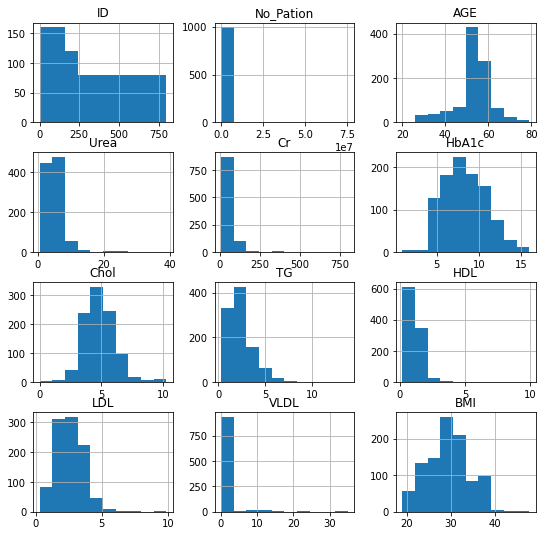

In [10]:
diabetes.hist(figsize=(9, 9))

In [11]:
#pandas_profiling.ProfileReport(diabetes)

## Phase 2 - Data Cleaning

In [12]:
diabetes.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [13]:
diabetes.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

### Processing for Gender mapping string values to numerical one 

In [14]:
diabetes.groupby('Gender').size()

Gender
F    434
M    565
f      1
dtype: int64

In [15]:
diabetes['Gender'] = diabetes['Gender'].map({'F':1, 'M':2, 'f':1})
diabetes.groupby('Gender').size()
diabetes.head()
diabetes.shape

Gender
1    435
2    565
dtype: int64

ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       2   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       2   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N

(1000, 14)

### Processing for CLASS mapping string values to numerical one 

In [16]:
diabetes['CLASS'] = diabetes['CLASS'].map({'Y':1, 'N':2,'P':3})
diabetes.head()
diabetes.shape

ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       2   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       2   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI  CLASS  
0  24.0      2  
1  23.0      2  
2  24.0      2  
3  24.0      2  
4  21.0      2

(1000, 14)

In [17]:
diabetes.groupby('CLASS').size()

CLASS
1    844
2    103
3     53
dtype: int64

In [18]:
diabetes.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [19]:
print(diabetes.shape)

(1000, 14)


In [20]:
df = diabetes

In [21]:
df.shape

(1000, 14)

## Phase 3 - Feature / Response Selection

In [22]:
# Features/Response
feature_names = ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI']
X = diabetes[feature_names]
y = diabetes.CLASS
X.head()

Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
1       2   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0
2       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
3       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0
4       2   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0

## Phase 4 - Model Selection

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [24]:
# Initial model selection process
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))

### Using Train/Test split

In [25]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes.CLASS, random_state=0)

In [26]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

KNeighborsClassifier()

SVC()

LogisticRegression(max_iter=4000)

DecisionTreeClassifier()

GaussianNB()

RandomForestClassifier()

GradientBoostingClassifier()

  Name  Score
0  KNN  0.888
1  SVC  0.844
2   LR  0.924
3   DT  0.988
4  GNB  0.916
5   RF  0.988
6   GB  0.988


In [27]:
# Build the model with the random forest regression algorithm:
model_RF = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

### Using K-Fold cross validation

In [28]:
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name  Score
0  KNN  0.873
1  SVC  0.823
2   LR  0.909
3   DT  0.946
4  GNB  0.928
5   RF  0.956
6   GB  0.960


[Text(0.5, 0, 'Classifier'), Text(0, 0.5, 'Accuracy')]

Text(0.0, 0.878, '0.8730')

Text(1.0, 0.8280000000000001, '0.8230')

Text(2.0, 0.914, '0.9090')

Text(3.0, 0.9510000000000001, '0.9460')

Text(4.0, 0.9330000000000002, '0.9280')

Text(5.0, 0.9610000000000001, '0.9560')

Text(6.0, 0.965, '0.9600')

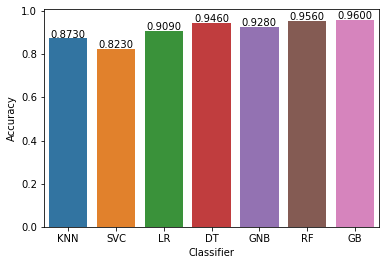

In [29]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Phase 5 - Feature Selection (Revisited)

In [30]:
from sklearn.feature_selection import RFECV

### Logistic Regression

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
      estimator=LogisticRegression(max_iter=4000), scoring='accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Logistic Regression CV score vs No of Features')

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (nb of correct classifications)')

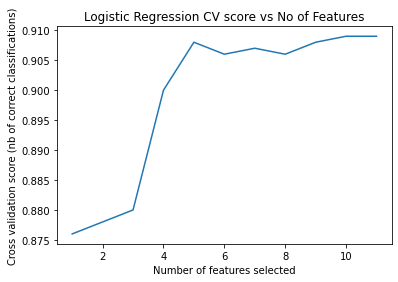

In [31]:
logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [32]:
feature_importance = list(zip(feature_names, rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


In [33]:
# Calculate accuracy scores 
X_new = diabetes[new_features]

initial_score = cross_val_score(logreg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(logreg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.909 
Accuracy after Feature Selection : 0.909 


### Gradient Boost

RFECV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
      estimator=GradientBoostingClassifier(), scoring='accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Gradient Boost CV score vs No of Features')

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (nb of correct classifications)')

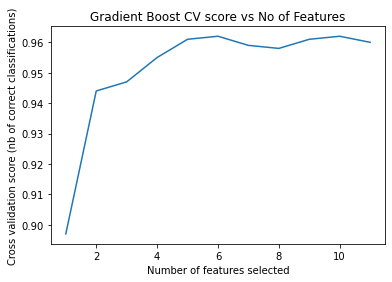

In [34]:
gb_model = GradientBoostingClassifier()

gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(X, y)

plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [35]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


In [36]:
X_new_gb = diabetes[new_features]

initial_score = cross_val_score(gb_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(gb_model, X_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.961 
Accuracy after Feature Selection : 0.96 


## Phase 6 - Model Parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Specify parameters
c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

In [39]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy', iid=False)
grid.fit(X_new, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=10, shuffle=False),
             estimator=LogisticRegression(), iid=False,
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [40]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 9, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=9, multi_class='ovr')


In [41]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

In [42]:
initial_score = cross_val_score(logreg_new, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.884 


### df columns

In [44]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [45]:
print(df.columns)

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


In [46]:
df.shape


(1000, 14)

In [47]:
df.head()


ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221       2   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656       1   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223       2   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI  CLASS  
0  24.0      2  
1  23.0      2  
2  24.0      2  
3  24.0      2  
4  21.0      2

<AxesSubplot:>

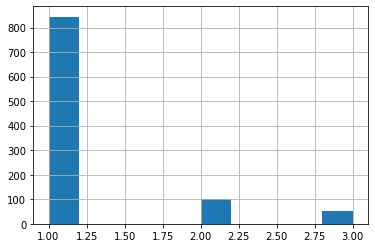

In [48]:
df['CLASS'].hist()


In [49]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['CLASS']
X =  df[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI']]
X_featurenames = X.columns

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [51]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

[4.23431181e-03 6.75736985e-02 5.62559669e-04 0.00000000e+00
 5.75115610e-01 5.58172362e-02 2.09556288e-02 2.16756885e-03
 5.16606955e-03 1.05512619e-02 2.57856054e-01]


Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 11 artists>

([<matplotlib.axis.YTick at 0x2bf600c1df0>,
 [Text(0, 0, 'Cr'),
  Text(0, 1, 'Urea'),
  Text(0, 2, 'HDL'),
  Text(0, 3, 'Gender'),
  Text(0, 4, 'LDL'),
  Text(0, 5, 'VLDL'),
  Text(0, 6, 'TG'),
  Text(0, 7, 'Chol'),
  Text(0, 8, 'AGE'),
  Text(0, 9, 'BMI'),
  Text(0, 10, 'HbA1c')])

Text(0.5, 0, 'Relative Importance')

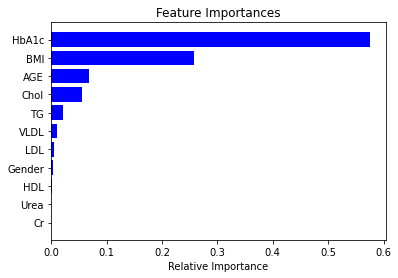

In [52]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## LIME

In [53]:
!pip install lime
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=X_featurenames, 
                    class_names=['CLASS'], 
                    # categorical_features=, 
                    # There is no categorical features in this example, otherwise specify them.                               
                    verbose=True, mode='regression')

In [54]:
Y_test[0:2]


993    1
859    1
Name: CLASS, dtype: int64

In [55]:
model.predict(X_test[0:2])


array([1., 1.])

In [56]:
#(1) X_test.iloc[0]

In [57]:
exp = explainer.explain_instance(X_test.iloc[0], model.predict)
exp.show_in_notebook(show_table=True, show_all=False)


Intercept 1.1566046712772668
Prediction_local [1.05867859]
Right: 1.0


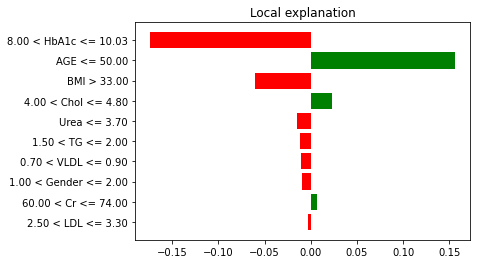

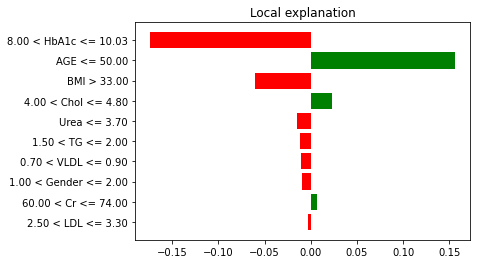

In [58]:
exp.as_pyplot_figure()


In [59]:
pd.DataFrame(exp.as_list())


0         1
0  8.00 < HbA1c <= 10.03 -0.173467
1           AGE <= 50.00  0.155758
2            BMI > 33.00 -0.060232
3    4.00 < Chol <= 4.80  0.023149
4           Urea <= 3.70 -0.014642
5      1.50 < TG <= 2.00 -0.011333
6    0.70 < VLDL <= 0.90 -0.010637
7  1.00 < Gender <= 2.00 -0.009856
8    60.00 < Cr <= 74.00  0.006443
9     2.50 < LDL <= 3.30 -0.003108

In [60]:
pd.DataFrame(exp.as_list())[1].sum()


-0.09792608277986461

In [61]:
1.1566046712772664-0.0979260827798637


1.0586785884974028

In [62]:
#(2) X_test.iloc[1]

In [63]:
exp = explainer.explain_instance(X_test.iloc[1], model.predict)
exp.show_in_notebook(show_table=True, show_all=False)

Intercept 1.2241481337233713
Prediction_local [0.93604152]
Right: 1.0


In [64]:
pd.DataFrame(exp.as_list())


0         1
0  8.00 < HbA1c <= 10.03 -0.183487
1   50.00 < AGE <= 55.00 -0.057740
2   26.00 < BMI <= 30.00 -0.053688
3           Chol <= 4.00  0.013909
4     1.80 < LDL <= 2.50 -0.010211
5             TG <= 1.50 -0.009905
6           VLDL <= 0.70  0.007551
7  1.00 < Gender <= 2.00  0.004318
8             Cr > 74.00  0.002911
9             HDL > 1.30 -0.001764

In [65]:
pd.DataFrame(exp.as_list())[1].sum()


-0.2881066100212593

In [66]:
1.2241481337233713 - 0.28810661002125876

0.9360415237021125

## SHAP

In [68]:
!pip install shap

In [69]:
import shap


In [70]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)


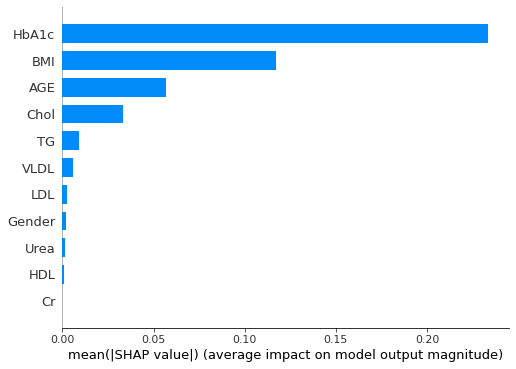

In [71]:
shap.summary_plot(shap_values, X_train, plot_type="bar")


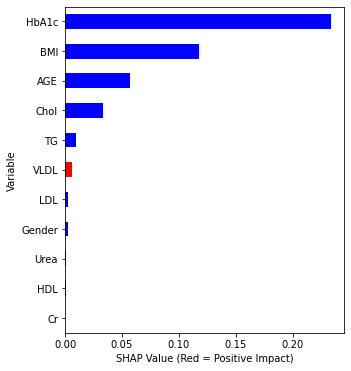

In [72]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)

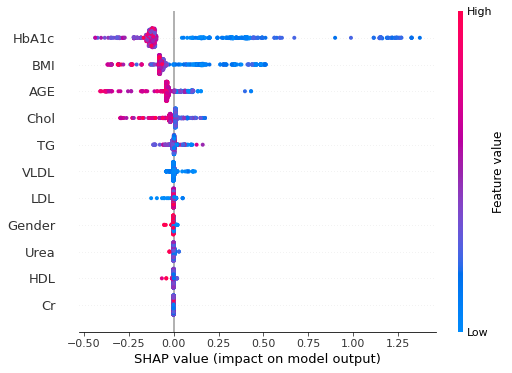

In [73]:
shap.summary_plot(shap_values, X_train)


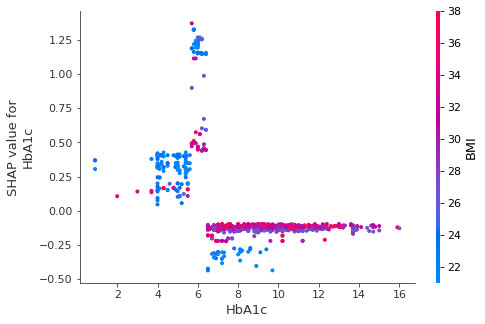

In [74]:
# we pass "Age" instead of an index because dependence_plot() will find it in X's column names for us
# Systolic BP was automatically chosen for coloring based on a potential interaction to check that 
# the interaction is really in the model see SHAP interaction values below
shap.dependence_plot("HbA1c", shap_values, X_train)


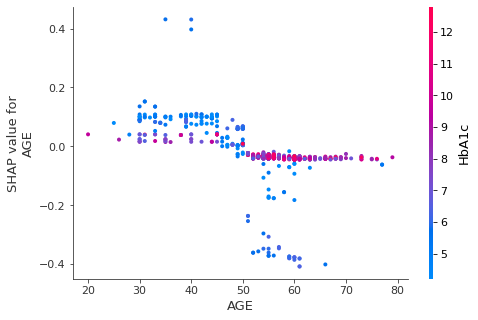

In [75]:
# we pass display_features so we get text display values for sex
shap.dependence_plot("AGE", shap_values, X_train)

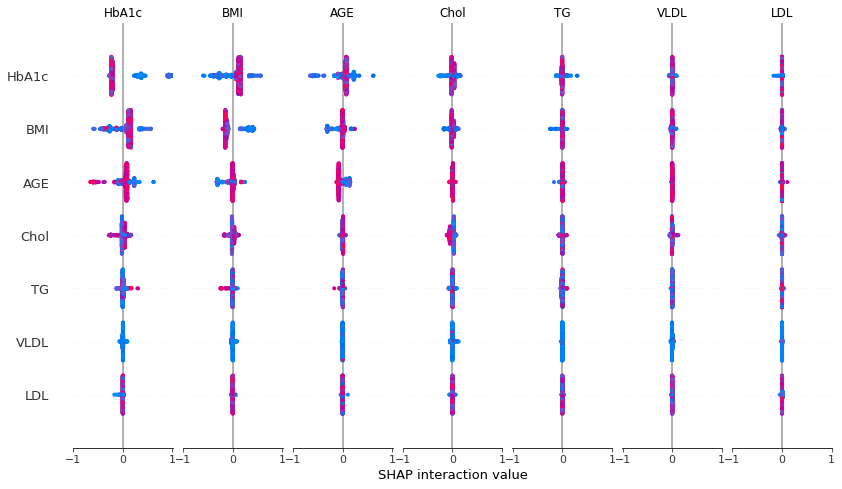

In [76]:
# takes a couple minutes since SHAP interaction values take a factor of 2 * # features
# more time than SHAP values to compute, since this is just an example we only explain
# the first 2,000 people in order to run quicker
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_train.iloc[:2000,:])

shap.summary_plot(shap_interaction_values, X_train.iloc[:2000,:])

In [77]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

random_picks = np.arange(1,200,50)
S = X_output.iloc[random_picks]
S

Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  predict
859       2   51   5.5  83    9.4   3.8  0.9  1.5  2.0   0.2  30.0      1.0
295       2   55   2.9  44    9.8   4.1  1.0  1.1  2.1   0.5  29.0      1.0
873       1   55   1.8  24    6.7   4.8  0.6  1.9  2.6   1.1  27.0      1.0
30        1   48   7.5  82    5.4   3.2  1.8  1.6  0.9   0.8  23.0      1.8

In [78]:
len(X_output)

200

In [79]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [80]:
X_train.mean()


Gender     1.571250
AGE       53.283750
Urea       5.171662
Cr        69.180000
HbA1c      8.233700
Chol       4.865650
TG         2.366750
HDL        1.220462
LDL        2.610437
VLDL       1.890750
BMI       29.502275
dtype: float64

In [81]:
Y_test.mean()


1.16

In [82]:
shap.initjs()
shap_plot(0)


In [83]:
shap.initjs()
shap_plot(1)


In [84]:
shap.initjs()
shap_plot(2)


In [85]:
shap.initjs()
shap_plot(3)


In [86]:
#The SHAP Works for Binary Target as Well

In [87]:
# Suppose the target is a binary variable
df['CLASS_bin'] = np.where(df['CLASS'].astype(int)>1,0,1)

In [88]:
print(df['CLASS_bin'])

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: CLASS_bin, Length: 1000, dtype: int32


In [89]:
Y = df['CLASS_bin']
X =  df[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape
Y_train.shape


(800, 11)

(800,)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

[0.         0.00990769 0.         0.00222356 0.38048854 0.08031004
 0.01381091 0.0012478  0.         0.         0.51201146]


Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 11 artists>

([<matplotlib.axis.YTick at 0x2bf62e7cb50>,
 [Text(0, 0, 'Gender'),
  Text(0, 1, 'Urea'),
  Text(0, 2, 'LDL'),
  Text(0, 3, 'VLDL'),
  Text(0, 4, 'HDL'),
  Text(0, 5, 'Cr'),
  Text(0, 6, 'AGE'),
  Text(0, 7, 'TG'),
  Text(0, 8, 'Chol'),
  Text(0, 9, 'HbA1c'),
  Text(0, 10, 'BMI')])

Text(0.5, 0, 'Relative Importance')

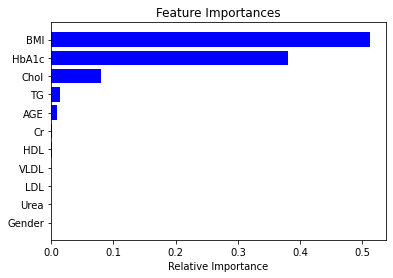

In [90]:
model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [91]:
print(model.feature_importances_)

[0.         0.00990769 0.         0.00222356 0.38048854 0.08031004
 0.01381091 0.0012478  0.         0.         0.51201146]


In [92]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)

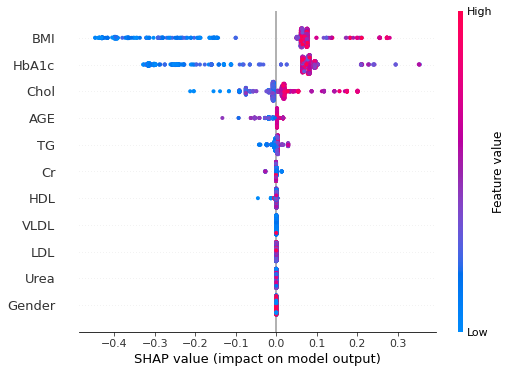

In [93]:
shap.summary_plot(shap_values, X_train)
